# Plotting Tree Depth With Extreme Gradient Boost


### Initialization

In [9]:

from xgboost import XGBRegressor
from utility import start
from utility import train
from utility import display
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test, df = start("encoded_data_04_18.csv")

In [10]:
mae_values = []
mae_train_values = []

for learn_rate in np.arange(1, 15):
    model = XGBRegressor(n_estimators=1000, max_depth=learn_rate, random_state=42, learning_rate=0.25)
    mae, mae_train = train(model, X_train, X_test, y_train, y_test)
    print(mae, mae_train)
    mae_values.append(mae)
    mae_train_values.append(mae_train)

Training Set Scores:
Mean Absolute Error (MAE): 1.16 M
Mean Absolute Percentage Error (MAPE): 65.76 %

Test Set Scores:
Mean Absolute Error (MAE): 1.18 M
Mean Absolute Percentage Error (MAPE): 64.06 %
1183420.4338821648 1157460.8407556685
Training Set Scores:
Mean Absolute Error (MAE): 0.86 M
Mean Absolute Percentage Error (MAPE): 50.03 %

Test Set Scores:
Mean Absolute Error (MAE): 1.01 M
Mean Absolute Percentage Error (MAPE): 53.97 %
1005589.281361318 861261.655910101
Training Set Scores:
Mean Absolute Error (MAE): 0.69 M
Mean Absolute Percentage Error (MAPE): 39.66 %

Test Set Scores:
Mean Absolute Error (MAE): 0.99 M
Mean Absolute Percentage Error (MAPE): 52.63 %
991286.5352312288 691312.0064917826
Training Set Scores:
Mean Absolute Error (MAE): 0.48 M
Mean Absolute Percentage Error (MAPE): 27.95 %

Test Set Scores:
Mean Absolute Error (MAE): 1.02 M
Mean Absolute Percentage Error (MAPE): 54.21 %
1021113.930418887 481519.59735246893
Training Set Scores:
Mean Absolute Error (MAE): 0.

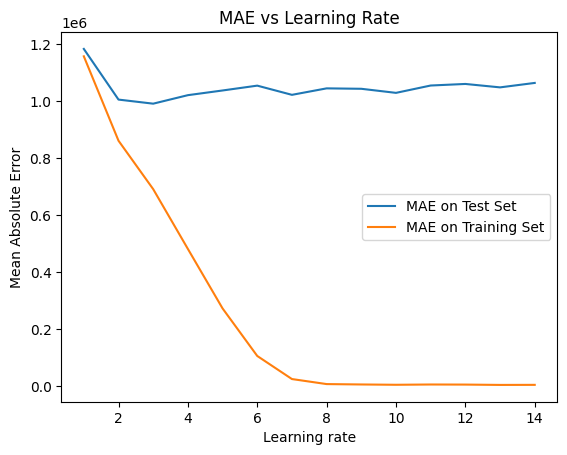

In [11]:
# Plot MAE vs MAE_train
depths = np.arange(1, 15)
plt.plot(depths, mae_values, label='MAE on Test Set')
plt.plot(depths, mae_train_values, label='MAE on Training Set')
plt.xlabel('Learning rate')
plt.ylabel('Mean Absolute Error')
plt.title('MAE vs Learning Rate')
plt.legend()
plt.show()

In [12]:
results, z = display(df, X_test, y_pred)
results


NameError: name 'y_pred' is not defined

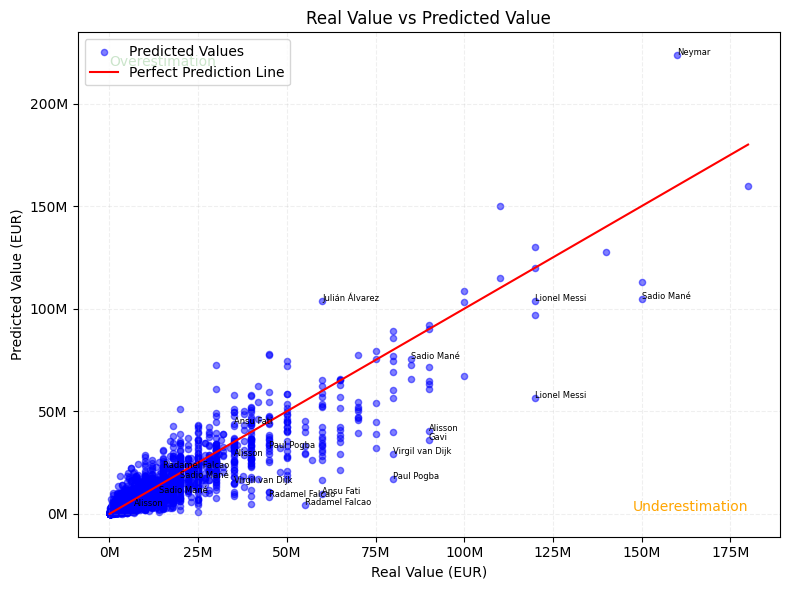

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# Calculate distances of each point from the optimal line
distances = np.abs(y_pred_original - y_test_original)

# Find the indices of points with maximum distances
max_distance_indices = np.argsort(distances)[-10:]  # Adjust the number to show more or fewer names

# Get the corresponding player names
furthest_names = z.iloc[max_distance_indices]['name'].tolist()

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, s=20, color='blue', alpha=0.5, marker='o', label='Predicted Values')
plt.xlabel("Real Value (EUR)")
plt.ylabel("Predicted Value (EUR)")
plt.title("Real Value vs Predicted Value")
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', label='Perfect Prediction Line')
plt.text(min(y_test_original), max(y_pred_original), "Overestimation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test_original), min(y_pred_original), "Underestimation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

# Annotate only the furthest points
for index, row in z.iterrows():
    if row['name'] in furthest_names:
        plt.annotate(row['name'], (row['market_value_in_eur'], row['Predicted_Value']), fontsize=6, color='black')

# Set formatter for x-axis and y-axis
def millions_formatter(x, pos):
    return f'{x / 1000000:.0f}M'

formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(alpha=0.2, linestyle='--', zorder=1)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
y_train.shape
y_train_original = np.power(10, y_train)
y_train_original.shape
print(y_train_original.shape, y_train_pred_original.shape)

(47250,) (47250,)


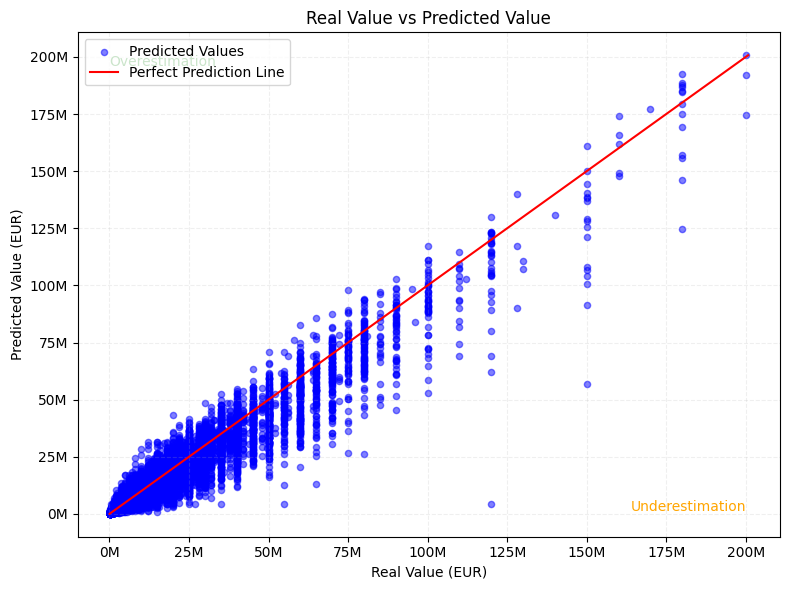

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# Calculate distances of each point from the optimal line

y_train_original = np.power(10, y_train)
distances = np.abs(y_train_pred_original - y_train_original)

# Find the indices of points with maximum distances
max_distance_indices = np.argsort(distances)[-10:]  # Adjust the number to show more or fewer names

# Get the corresponding player names
#furthest_names = z.iloc[max_distance_indices]['name'].tolist()

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train_original, y_train_pred_original, s=20, color='blue', alpha=0.5, marker='o', label='Predicted Values')
plt.xlabel("Real Value (EUR)")
plt.ylabel("Predicted Value (EUR)")
plt.title("Real Value vs Predicted Value")
plt.plot([min(y_train_pred_original), max(y_train_pred_original)], [min(y_train_pred_original), max(y_train_pred_original)], color='red', label='Perfect Prediction Line')
plt.text(min(y_train_original), max(y_train_pred_original), "Overestimation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_train_original), min(y_train_pred_original), "Underestimation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

# Annotate only the furthest points
#for index, row in z.iterrows():
#    if row['name'] in furthest_names:
#        plt.annotate(row['name'], (row['market_value_in_eur'], row['Predicted_Value']), fontsize=6, color='black')

# Set formatter for x-axis and y-axis
def millions_formatter(x, pos):
    return f'{x / 1000000:.0f}M'

formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(alpha=0.2, linestyle='--', zorder=1)
plt.legend()
plt.tight_layout()
plt.show()


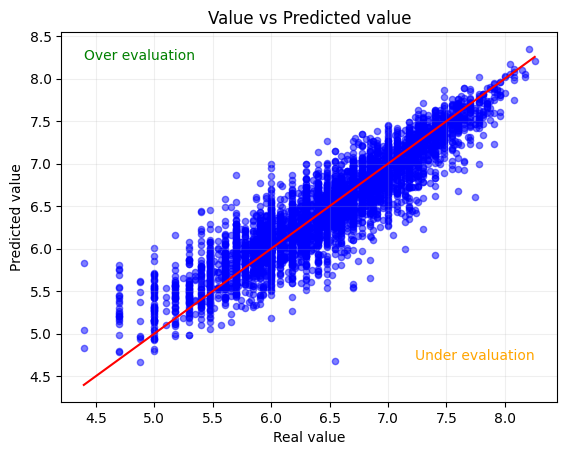

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred, s=20, color='blue', alpha=0.5)  # Set dot size to 20, blue color, and transparency to 0.5
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Value vs Predicted value")

# Add diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.text(min(y_test), max(y_pred), "Over evaluation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test), min(y_pred), "Under evaluation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')
plt.grid(alpha=0.2, zorder=1)

plt.show()


30000000.0


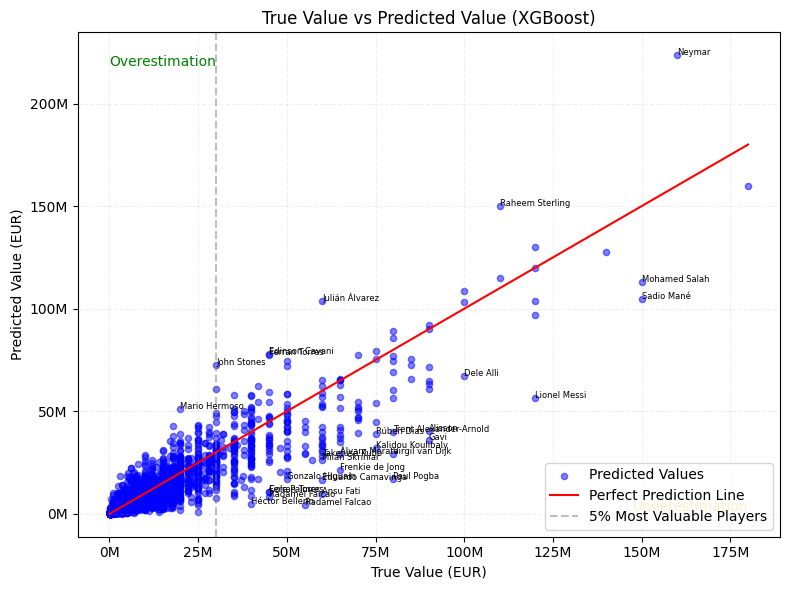

In [ ]:
import numpy as np

# Calculate distances of each point from the optimal line
distances = np.abs(y_pred_original - y_test_original)

# Find the indices of points with maximum distances
max_distance_indices = np.argsort(distances)[-30:]  # Adjust the number to show more or fewer names

# Get the corresponding player names
furthest_names = z.iloc[max_distance_indices]['name'].tolist()

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, s=20, color='blue', alpha=0.5, marker='o', label='Predicted Values')
plt.xlabel("True Value (EUR)")
plt.ylabel("Predicted Value (EUR)")
plt.title("True Value vs Predicted Value (XGBoost)")
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', label='Perfect Prediction Line')
plt.text(min(y_test_original), max(y_pred_original), "Overestimation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test_original), min(y_pred_original), "Underestimation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

# Annotate only the furthest points
for index in max_distance_indices:
    row = z.iloc[index]
    plt.annotate(row['name'], (row['market_value_in_eur'], row['Predicted_Value']), fontsize=6, color='black')

# Set formatter for x-axis and y-axis
def millions_formatter(x, pos):
    return f'{x / 1000000:.0f}M'

# Identify the 1% most valuable players
top_1_percent = z.nlargest(int(len(z) * 0.05), 'market_value_in_eur')
top_1_percent = top_1_percent.sort_values(by='market_value_in_eur')
lowest_value_player = top_1_percent.iloc[0]['market_value_in_eur']
# Add vertical line for the 1% most valuable players
print(lowest_value_player)
plt.axvline(x=lowest_value_player, color='gray', linestyle='--', label='5% Most Valuable Players', alpha=0.5)
    
formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(alpha=0.2, linestyle='--', zorder=1)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
XGBRegressor.plot_importance(model)

AttributeError: type object 'XGBRegressor' has no attribute 'plot_importance'